Imports

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read Data

In [29]:
file = pd.ExcelFile("../../data/v4/Handball 3. Liga vom 19.12.2022.xlsx")

file.sheet_names

df = file.parse('3. Liga')

# drop last col comments
df = df.iloc[:, :-1]
df.columns

Index(['Heimmannschaft', 'Gastmannschaft', 'Spieltag', 'Name', 'Spielminute',
       'Differenz Pfiff 1 und 2 (in Sekunden)', 'Tore Verein', 'Tore Gegner',
       'Torwartposition (1 = vorne, 2 = hinten)',
       'Wurf erfolgreich (0= Nein, 1 = Ja, 2 = im Nachwurf)',
       'L-R-Händer (1= Rechtshänder; 2= Linkshänder)', 'Wurfrichtung (1-9)?',
       'Drucksituation?\n0 = Nein, 1 = Torwartwechsel\n2 = letzter 7 Meter gehalten\n3 = Tordifferenz =< 4 + ab 50. Spielminute\n4 = 1 + 2, 5 = 1 + 3, 6 = 2 + 3, 7 = 1 + 2 + 3, 8 = letzer 7-Meter erst im Nachwurf erfolgreich',
       'Anzahl 7-Meter im Spiel (der wievielte 7-Meter im Spiel vom Spieler)',
       'Wurfquadrant des letzten 7-Meters (1-9)',
       'letzter 7-Meter erfolgreich \n(1= ja; 0= Nein; 2 = im Nachwurf erfolgreich)?'],
      dtype='object')

Cleanup & Renaming

In [30]:
df.replace('unklar', np.nan,inplace=True)
df.replace('unklar ', np.nan,inplace=True)
df.replace('fehlend', np.nan,inplace=True)
#df.dropna(inplace=True)
df.replace('-', np.nan,inplace=True)
df.columns =[ 'homeTeam','opponentTeam','day','name','playTime',
              'whistleThrowTime','homeGoals','opponentGoals','goalKeeperPosition',
              'throwSuccess','LRHandy','throwDirection','pressureSituation','noOfThrowsFromPlayer',
              'throwQuadrantLastThrow','lastThrowSuccess']
df = df.astype({'homeTeam':'string', 'opponentTeam':'string','day':'float16','name':'string','playTime':'float16',
              'homeGoals':'float16','opponentGoals':'float16','whistleThrowTime':'float16','goalKeeperPosition':'float16',
              'throwSuccess':'float16','LRHandy':'float16','throwDirection':'float16','pressureSituation':'float16','noOfThrowsFromPlayer':'float16',
              'throwQuadrantLastThrow':'float16','lastThrowSuccess':'float16' })
df.head()

,homeTeam,opponentTeam,day,name,playTime,whistleThrowTime,homeGoals,opponentGoals,goalKeeperPosition,throwSuccess,LRHandy,throwDirection,pressureSituation,noOfThrowsFromPlayer,throwQuadrantLastThrow,lastThrowSuccess
0,TV Emsdetten,ASV Hamm-Westfalen II,1.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HLZ Ahlener SG,TV Emsdetten,2.0,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TV Emsdetten,VfL Gladbeck,3.0,Holzner,2.0,23.0,0.0,0.0,1.0,1.0,1.0,8.0,0.0,1.0,NaN,1.0
3,TV Emsdetten,VfL Gladbeck,3.0,Holzner,7.0,16.0,5.0,1.0,1.0,1.0,1.0,3.0,0.0,2.0,8.0,1.0
4,TV Emsdetten,VfL Gladbeck,3.0,Holzner,31.0,28.0,19.0,9.0,1.0,1.0,1.0,7.0,0.0,3.0,3.0,1.0


In [47]:
df = df.loc[:,('name','throwDirection','throwSuccess')].copy()
df.dropna(inplace=True)
df['throwSuccess'].replace(2.0, 1.0,inplace=True)

df1 =pd.crosstab(df['name'], df['throwDirection'], margins=True, margins_name="Total") 
df1

throwDirection,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,Total
name,,,,,,,,,,
Bauer,0,0,0,1,1,0,0,1,0,3
Brüren,2,0,3,0,0,1,7,1,9,23
Fröhlich,0,1,1,0,0,0,1,1,2,6
Grosser,1,0,1,1,0,0,0,0,0,3
Götz,0,0,0,0,0,1,0,0,0,1
Haller,0,0,1,0,0,0,1,0,0,2
Holzner,4,1,8,0,1,0,9,5,5,33
Kerst,6,0,6,2,0,2,17,5,1,39
Klasmann,0,0,4,0,1,0,6,0,0,11


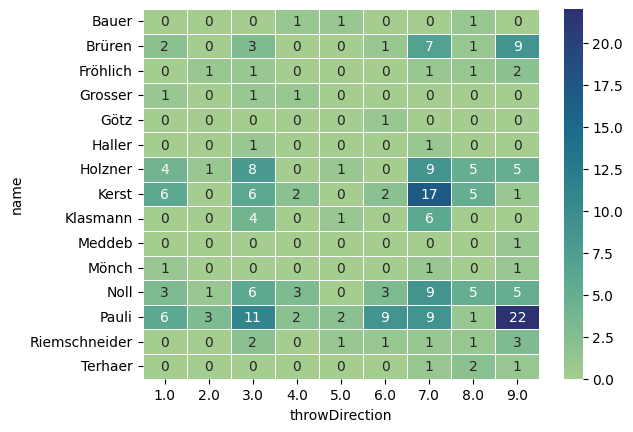

In [45]:
ax = sns.heatmap(pd.crosstab(df['name'], df['throwDirection']), linewidth=0.5, annot=True, cmap="crest")
#ax.xaxis.tick_top()
plt.show()

In [33]:
df2 =pd.crosstab(df['name'], df['throwSuccess']) 
df2

throwSuccess,0.0,1.0
name,,
Bauer,2,1
Brüren,4,19
Fröhlich,3,3
Grosser,0,3
Götz,1,0
Haller,1,1
Holzner,4,29
Kerst,5,34
Klasmann,1,10


In [59]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                  0.0  1.0
name          throwDirection          
Bauer         4.0               1    0
              5.0               0    1
              8.0               1    0
Brüren        1.0               1    1
              3.0               1    2
              6.0               1    0
              7.0               1    6
              8.0               0    1
              9.0               0    9
Fröhlich      2.0               0    1
              3.0               1    0
              7.0               0    1
              8.0               1    0
              9.0               1    1
Grosser       1.0               0    1
              3.0               0    1
              4.0               0    1
Götz          6.0               1    0
Haller        3.0               0    1
              7.0               1    0
Holzner       1.0               0    4
              2.0               1    0
              3.0               0    8
              5.0               1    0
              7.0               1    8
              8.0               0    5
              9.0               1    4
Kerst         1.0               0    6
              3.0               1    5
              4.0               0    2
              6.0               0    2
              7.0               3   14
              8.0               1    4
              9.0               0    1
Klasmann      3.0               0    4
              5.0               1    0
              7.0               0    6
Meddeb        9.0               1    0
Mönch         1.0               1    0
              7.0               1    0
              9.0               0    1
Noll          1.0               1    2
              2.0               1    0
              3.0               1    5
              4.0               1    2
              6.0               2    1
              7.0               1    8
              8.0               2    3
              9.0               0    5
Pauli         1.0               0    6
              2.0               0    3
              3.0               1   10
              4.0               1    1
              5.0               0    2
              6.0               1    8
              7.0               2    7
              8.0               0    1
              9.0               4   18
Riemschneider 3.0               0    2
              5.0               1    0
              6.0               1    0
              7.0               0    1
              8.0               1    0
              9.0               0    3
Terhaer       7.0               0    1
              8.0               1    1
              9.0               0    1

In [ ]:
df3 = pd.crosstab([df['name'],df['throwDirection']], df['throwSuccess']) 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df3

throwSuccess                  0.0  1.0
name          throwDirection          
Bauer         4.0               1    0
              5.0               0    1
              8.0               1    0
Brüren        1.0               1    1
              3.0               1    2
              6.0               1    0
              7.0               1    6
              8.0               0    1
              9.0               0    9
Fröhlich      2.0               0    1
              3.0               1    0
              7.0               0    1
              8.0               1    0
              9.0               1    1
Grosser       1.0               0    1
              3.0               0    1
              4.0               0    1
Götz          6.0               1    0
Haller        3.0               0    1
              7.0               1    0
Holzner       1.0               0    4
              2.0               1    0
              3.0               0    8
              5.0               1    0
              7.0               1    8
              8.0               0    5
              9.0               1    4
Kerst         1.0               0    6
              3.0               1    5
              4.0               0    2
              6.0               0    2
              7.0               3   14
              8.0               1    4
              9.0               0    1
Klasmann      3.0               0    4
              5.0               1    0
              7.0               0    6
Meddeb        9.0               1    0
Mönch         1.0               1    0
              7.0               1    0
              9.0               0    1
Noll          1.0               1    2
              2.0               1    0
              3.0               1    5
              4.0               1    2
              6.0               2    1
              7.0               1    8
              8.0               2    3
              9.0               0    5
Pauli         1.0               0    6
              2.0               0    3
              3.0               1   10
              4.0               1    1
              5.0               0    2
              6.0               1    8
              7.0               2    7
              8.0               0    1
              9.0               4   18
Riemschneider 3.0               0    2
              5.0               1    0
              6.0               1    0
              7.0               0    1
              8.0               1    0
              9.0               0    3
Terhaer       7.0               0    1
              8.0               1    1
              9.0               0    1